# Question 1

In this question we will
- Implement the vector grandient operators for colour images.
- Implement the kurtosis measure of image blur/sharpness which is caluclated from image gradients and assess whether it is a reasonable metric of blur.
- Learn to create blur maps of images to visualize the amount of blur in local image patches.



# Step 1: Implement the vector gradient.

Implement the vector gradient as described in the lecture slides in the `color_sobel_edges()` function below.  Use Sobel filters to estimate partial derivatives.  Use the `color_dot_product()` function (provided) to compute the necessary dot products to obtain gxx, gyy, and gxy.  Return an array containing the gradient magnitudes for each pixel, i.e. a graident magnitude image.  Optionally, return a second array containing the gradient directions for each pixel.

The input image must be dtype `float` or `uint8`.  If it is `uint8` convert it to `float` before processing.  Leave the magnitude image ouput as dtype `float` regardless of the input's dtype.

In [2]:
import skimage.util as util
import numpy as np


def color_dot_product(A, B):
    '''
    Element-by-element dot product in a 2D array of vectors.

    :return: An array in which index [i,j] is the dot product of A[i,j,:] and B[i,j,:].
    '''
    return np.sum(A.conj()*B, axis=2)



def color_sobel_edges(I):
    '''
    Finish me!
    
    :param I: image
    :return: 
    '''
    orig_dtype = I.dtype
    if orig_dtype == np.uint8:
        I = util.img_as_float(I)
    elif orig_dtype != np.float64:
        raise TypeError("Input image must be dtype uint8 or float64")
    
    # Ensure image has shape (H,W,C)
    if I.ndim == 2:
        I = I[..., np.newaxis]
    elif I.ndim == 3 and I.shape[2] == 4:
        # If RGBA, drop alpha channel
        I = I[..., :3]

    H, W, C = I.shape
    print(f"Image shape: H={H}, W={W}, C={C}")

    # Sobel kernels (we'll implement convolution via padded shifts using numpy)
    kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=float)
    ky = kx.T

    # Prepare arrays for partial derivatives
    u = np.empty((H, W, C), dtype=float)
    v = np.empty((H, W, C), dtype=float)

    # For each channel compute derivatives using reflect padding and weighted sum of shifted slices
    for c in range(C):
        ch = I[..., c]
        p = np.pad(ch, pad_width=1, mode='reflect')  # shape (H+2, W+2)

        # shifted neighbourhoods
        p00 = p[:-2, :-2]; p01 = p[:-2, 1:-1]; p02 = p[:-2, 2:]
        p10 = p[1:-1, :-2]; p11 = p[1:-1, 1:-1]; p12 = p[1:-1, 2:]
        p20 = p[2:, :-2];  p21 = p[2:, 1:-1];  p22 = p[2:, 2:]

        # horizontal derivative (kx)
        # horizontal derivative (kx) using kernel coefficients
        u[..., c] = (kx[0,0] * p00) + (kx[0,1] * p01) + (kx[0,2] * p02) + \
                    (kx[1,0] * p10) + (kx[1,1] * p11) + (kx[1,2] * p12) + \
                    (kx[2,0] * p20) + (kx[2,1] * p21) + (kx[2,2] * p22)

        # vertical derivative (ky) using kernel coefficients
        v[..., c] = (ky[0,0] * p00) + (ky[0,1] * p01) + (ky[0,2] * p02) + \
                    (ky[1,0] * p10) + (ky[1,1] * p11) + (ky[1,2] * p12) + \
                    (ky[2,0] * p20) + (ky[2,1] * p21) + (ky[2,2] * p22)

    # Compute gxx, gyy, gxy as per lecture (2D arrays)
    gxx = color_dot_product(u, u)
    gyy = color_dot_product(v, v)
    gxy = color_dot_product(u, v)

    # gradient direction theta using four-quadrant arctan2
    theta = 0.5 * np.arctan2(2.0 * gxy, (gxx - gyy))

    # directional energy F_theta (vector-gradient magnitude squared)
    two_theta = 2.0 * theta
    Ftheta = 0.5 * ( (gxx + gyy) + (gxx - gyy) * np.cos(two_theta) + 2.0 * gxy * np.sin(two_theta) )

    # magnitude is sqrt of Ftheta (ensure non-negative inside sqrt due to numeric error)
    magnitude = np.sqrt(np.maximum(Ftheta, 0.0))

    return magnitude
    
    

# Step 2: Examine behavior of the kurtosis sharpness metric.

Write a function which:

* takes as input an input image, a minimum value of sigma, and a maximum value of sigma.
* applies different amounts of Gaussian blur to the original image for integer values of sigma between the provided minimum and maximum values of sigma. (reminder: sigma describes the standard deviation of the gaussian filter mask used to blur the image).
    * Note: if using `skimage.filters.gaussian()`, you'll need to set the `channel_axis` parameter appropriately since you are applying it to a colour image.
* For each blurred image, compute the gradient magnitude using color_sobel_edges(), then compute compute the kurtosis sharpness measure.  This is *log(k+3)* where *k* is the kurtosis of the gradient magnitude image of the blurred image as described in the assignment description document.  See `scipy.stats.kurtosis()`.
* Return a tuple consisting of the range object of sigma values used and the list of computed kurtosis values for each sigma.

Then:
* Call the function using `mushroom.jpg` as the input image, a minimum sigma of 1, and a maximum sigma of 30.  Use a smaller max sigma until you are sure it's working, then increase to 30, as it can take a few minutes to do all the filtering.  Use the return values from your function to plot a line graph of gaussian blur sigma vs. blur measure (kurtosis) for the waterfall image.  Add appropriate axis labels and a descriptive title.  Sample output is provided in the assignment description document.



Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3
Image shape: H=887, W=1024, C=3


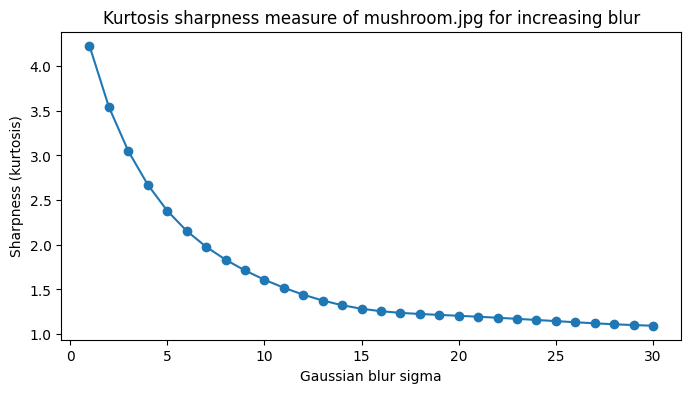

In [ ]:

%matplotlib inline
from skimage.filters import gaussian
from scipy.stats import kurtosis
from skimage.io import imread
import matplotlib.pyplot as plt

def test_blur_measure(I, min_sigma, max_sigma):
    '''
    Finish me!
    
    :param I: 
    :param min_sigma: 
    :param max_sigma: 
    :return: 
    '''
    if I.dtype == np.uint8:
        If = util.img_as_float(I)
    else:
        If = I.copy()

    sigmas = range(min_sigma, max_sigma + 1)
    sharpness_values = []
    for s in sigmas:
        blurred = gaussian(If, sigma=s, channel_axis=-1 if If.ndim == 3 else None)
        mag = color_sobel_edges(blurred)          # returns 2D float array of gradient magnitudes
        flat = np.reshape(mag, (-1,))                       # 1D samples for kurtosis
        k_excess = kurtosis(flat, fisher=True, bias=False)  # excess kurtosis (k-3)
        sharpness = np.log(k_excess + 3.0)        # log(K + 3)
        sharpness_values.append(sharpness)

    return sigmas, sharpness_values

I = imread('mushroom.jpg')

sigmas, sharpness_values = test_blur_measure(I, 1, 30)

plt.figure(figsize=(8,4))
plt.plot(list(sigmas), sharpness_values)
plt.xlabel('Gaussian blur sigma')
plt.ylabel('Sharpness (kurtosis)')
plt.title('Kurtosis sharpness measure of mushroom.jpg for increasing blur')
plt.show()

# Step 3:  Create a local blur map

Write a function which:

* takes as input an image and a window size (in pixels).
* computes the local sharpness of the input image (i.e. log(kurtosis+3)) for each tiled, non-overlapping square window of the given window size
* stores each local sharpness in an array where each entry represents one window of the input image (the size of this array can be computed by integer division of the original image dimensions by the window size)
* returns the array of local sharpnesses.

Then:

- call the function you just wrote with `mushroom.jpg` as the input image and 100 as the window size.  
- Plot the returned array as an image using `plt.imshow()`.  Do not rescale this image with `vmin=` or `vmax=`, and use the default colormap (don't change it to `'gray'`).  
- Add a color scale bar using `plt.colorbar()`.  Sample output is provided in the assignment description document.



Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image sh

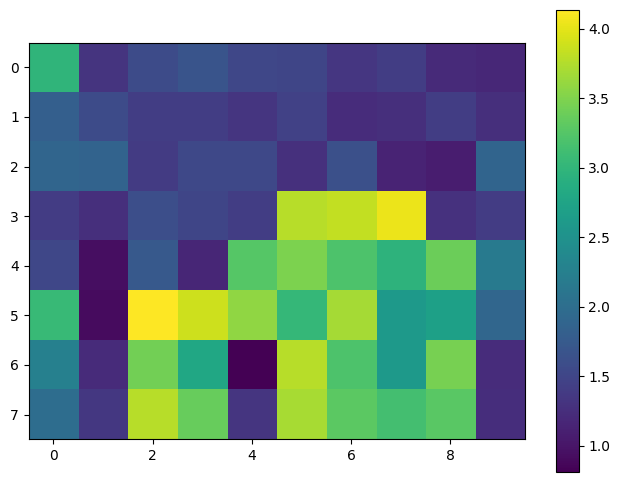

In [ ]:
def sharpness_map(I, window_size):
    '''
    
    Finish me!
    
    :param I: 
    :param window_size: 
    :return: 
    '''

    if I.dtype == np.uint8:
        If = util.img_as_float(I)
    else:
        If = I.copy()

    if If.ndim == 2:
        If = If[..., np.newaxis]
    elif If.ndim == 3 and If.shape[2] == 4:
        If = If[..., :3]

    H, W = If.shape[:2]
    nh = H // window_size
    nw = W // window_size

    out = np.empty((nh, nw), dtype=float)

    for i in range(nh):
        y0 = i * window_size
        y1 = y0 + window_size
        for j in range(nw):
            x0 = j * window_size
            x1 = x0 + window_size
            tile = If[y0:y1, x0:x1]

          
            mag = color_sobel_edges(tile)           
            flat = np.reshape(mag, (-1,))           
            k_excess = kurtosis(flat, fisher=True, bias=False)  
            out[i, j] = np.log(k_excess + 3.0)

    return out

I = imread('mushroom.jpg')
S = sharpness_map(I, 100)

plt.figure(figsize=(8,6))
plt.imshow(S)
plt.colorbar()
plt.show()

# Step 4: Try it on another image.

Use the functions you wrote to produce the same plots as in steps 2 and 3 but for the `waterfall.jpg` image instead.


Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3
Image shape: H=1500, W=2000, C=3


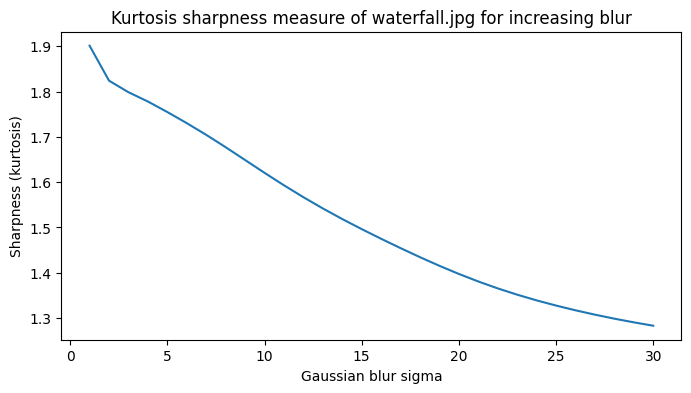

Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image shape: H=100, W=100, C=3
Image sh

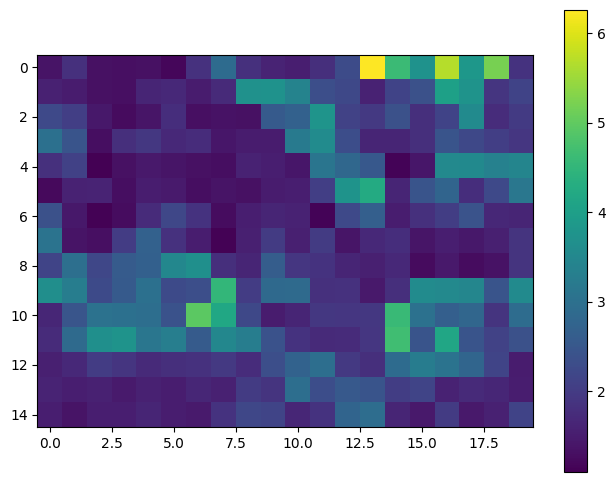

In [9]:
# Write your code here.
I = imread('waterfall.jpg')

sigmas, sharpness_values = test_blur_measure(I, 1, 30)

plt.figure(figsize=(8,4))
plt.plot(list(sigmas), sharpness_values)
plt.xlabel('Gaussian blur sigma')
plt.ylabel('Sharpness (kurtosis)')
plt.title('Kurtosis sharpness measure of waterfall.jpg for increasing blur')
plt.show()

S = sharpness_map(I, 100)

plt.figure(figsize=(8,6))
plt.imshow(S)
plt.colorbar()
plt.show()


# Step 5: Thinking and Qualitative Analysis

### Answer the following questions, right here in this block.

1. Based on your observations of the previous results (you can try it on additional images if you wish), discuss the advantages and disadvantages of the kurtosis-based measure of image sharpness, citing specific evidence observed to justify your claims.

	_Your answer:_  An advantage is that it provides global numerical indicators of sharpness. A disadvantage is that it is sensitive to noise, which we can see from the blur versus sharpness plots, as the blue increases, the sharpness decreases.
    
2. Think of what the shape of a histogram of gradient magnitudes would look like for a sharp image.  Why does this set of gradient magnitudes have high kurtosis?  (It might help to look up kurtosis and see what it measures about a histogram!)

	_Your answer:_  Because sharp images show high kurtosis because their gradient magnitudes are concentrated around zero. 

3. Now think what would happen as that same image gets blurrier.  Explain how the shape of the histogram would change, and the corresponding effect on the kurtosis.

	_Your answer:_  it causes the histogram of the gradient magnitudes to widen near the center, while causing the tails to shrink. this results in a flatter, more bell shaped distribution with lower kurtosis.